# Tweaking parameters

This tutorial demonstrates how to use the ScSherlock algorithm to identify cell type-specific marker genes from single-cell RNA sequencing data. We'll explore various parameters and how they affect the marker gene identification process.


## 1. Installation and Setup

First, let's import all the necessary libraries:

In [5]:
# Import required libraries
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from typing import Dict, List

# Import ScSherlock and related classes
from scSherlock.scSherlock.scSherlock.sherlock_obj import ScSherlock, ScSherlockConfig, ScoringMethod, ParameterEstimation, AggregationMethod


## 2. Loading and Preparing Example Data

For this tutorial, we'll use a publicly available single-cell RNA-seq dataset. Let's load and prepare the data:

In [6]:
adata = sc.read_h5ad('/home/croizer/data/hao_2021_SCT.h5ad')

adata.obs['cell_type'] = adata.obs["celltype.l3"] 
adata.obs['patient_id'] = adata.obs["donor"] 

/home/croizer/.conda/envs/scsherlock/lib/python3.13/site-packages/anndata/compat/__init__.py:363: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


## 3. Basic Usage of ScSherlock

Now that we have our data prepared, let's run ScSherlock with default parameters:

In [7]:
# Initialize ScSherlock with default parameters
print("Initializing ScSherlock with default parameters...")
sherlock_default = ScSherlock(
    adata=adata,              # AnnData object with gene expression data
    column_ctype="cell_type", # Column in adata.obs containing cell type annotations
    column_patient="patient_id"  # Column in adata.obs containing patient IDs
)

# Run with theoretical method (faster than empirical)
print("Running ScSherlock with theoretical method...")
start_time = time.time()
markers_default = sherlock_default.run(method='theoric')
end_time = time.time()
print(f"ScSherlock completed in {end_time - start_time:.2f} seconds")

# Display identified markers
print(f"\nIdentified {len(markers_default)} marker genes:")
for cell_type, gene in markers_default.items():
    print(f"Cell type {cell_type}: {gene}")

Initializing ScSherlock with default parameters...


2025-03-26 11:28:39,600 - ScSherlock - INFO - Pre-filtering genes...
2025-03-26 11:28:39,601 - ScSherlock - INFO - Original dataset: 161764 cells, 20729 genes
2025-03-26 11:28:47,481 - ScSherlock - INFO - Filtered dataset: 161764 cells, 19498 genes
2025-03-26 11:28:47,483 - ScSherlock - INFO - Removed 1231 genes with low expression
2025-03-26 11:28:47,489 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 19498) data matrix
2025-03-26 11:28:47,490 - ScSherlock - INFO - Calculating theoretical scores...


Running ScSherlock with theoretical method...


Aggregating Samples: 100%|███████████████████| 464/464 [00:00<00:00, 605.13it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
2025-03-26 11:28:49,984 - ScSherlock - INFO - Starting parallel processing with joblib
2025-03-26 11:30:23,848 - ScSherlock - INFO - Applying multi-category correction...
2025-03-26 11:30:23,880 - ScSherlock - INFO - Aggregating scores...
2025-03-26 11:30:23,963 - ScSherlock - INFO - Sorting scores...
2025-03-26 11:30:24,167 - ScSherlock - INFO - Identifying top markers...


{'CD14 Mono':             1            10            25    aggregated  exp_prop
HP        1.0  1.000000e+00  1.000000e+00  1.000000e+00  0.000022
SERPINB2  1.0  1.000000e+00  1.000000e+00  1.000000e+00  0.000015
MYO7A     1.0  1.000000e+00  1.000000e+00  1.000000e+00  0.000008
KCNJ15    1.0  1.000000e+00  1.000000e+00  1.000000e+00  0.000008
HTRA1     1.0  1.000000e+00  1.000000e+00  1.000000e+00  0.000007
...       ...           ...           ...           ...       ...
RPS27     0.0 -1.080006e-15 -7.247690e-37 -3.600019e-16  0.001303
HNRNPA1   0.0  0.000000e+00 -2.873384e-15 -9.577948e-16  0.000500
NPM1      0.0  0.000000e+00 -6.509281e-15 -2.169760e-15  0.000370
CALM1     0.0  0.000000e+00 -1.292431e-14 -4.308103e-15  0.000468
KLF2      0.0  0.000000e+00 -3.252211e-14 -1.084070e-14  0.000386

[19498 rows x 5 columns], 'CD4 TCM_1':               1   10            25    aggregated      exp_prop
AC025917.1  1.0  1.0  1.000000e+00  1.000000e+00  6.170681e-07
CTAGE6      1.0  1.0  1.0000

In [8]:
# Export markers to a DataFrame for easier analysis
markers_df = sherlock_default.export_markers()
display(markers_df)

,cell_type,marker_gene,model_used,aggregated_score,theoretical_score,empirical_score,expression_proportion
0,CD14 Mono,HP,theoric,1.000000,0.401082,NaN,2.231479e-05
1,CD4 TCM_1,AC025917.1,theoric,1.000000,0.008240,NaN,6.170681e-07
2,CD8 Naive,SFRP5,theoric,1.000000,0.241796,NaN,1.452873e-05
3,NK_2,ERFE,theoric,1.000000,0.037884,NaN,1.712834e-06
4,CD8 TEM_1,AL050344.1,theoric,1.000000,0.033297,NaN,1.623261e-06
5,CD16 Mono,ZBTB7C,theoric,1.000000,0.110469,NaN,4.071479e-06
6,B intermediate lambda,AC098484.2,theoric,1.000000,0.010667,NaN,6.345078e-07
7,CD4 Naive,AC000032.1,theoric,1.000000,0.006557,NaN,6.651144e-07
8,B naive kappa,SYN3,theoric,1.000000,0.040177,NaN,2.080677e-06
9,CD4 TCM_3,SLC44A3,theoric,1.000000,0.023850,NaN,1.134881e-06


2025-03-26 11:30:27,588 - ScSherlock - INFO - Plotting 58 genes for 58 cell types using theoric model
... storing 'orig.ident' as categorical
... storing 'lane' as categorical
... storing 'donor' as categorical
... storing 'time' as categorical
... storing 'celltype.l1' as categorical
... storing 'celltype.l2' as categorical
... storing 'celltype.l3' as categorical
... storing 'Phase' as categorical
... storing 'patient_id' as categorical


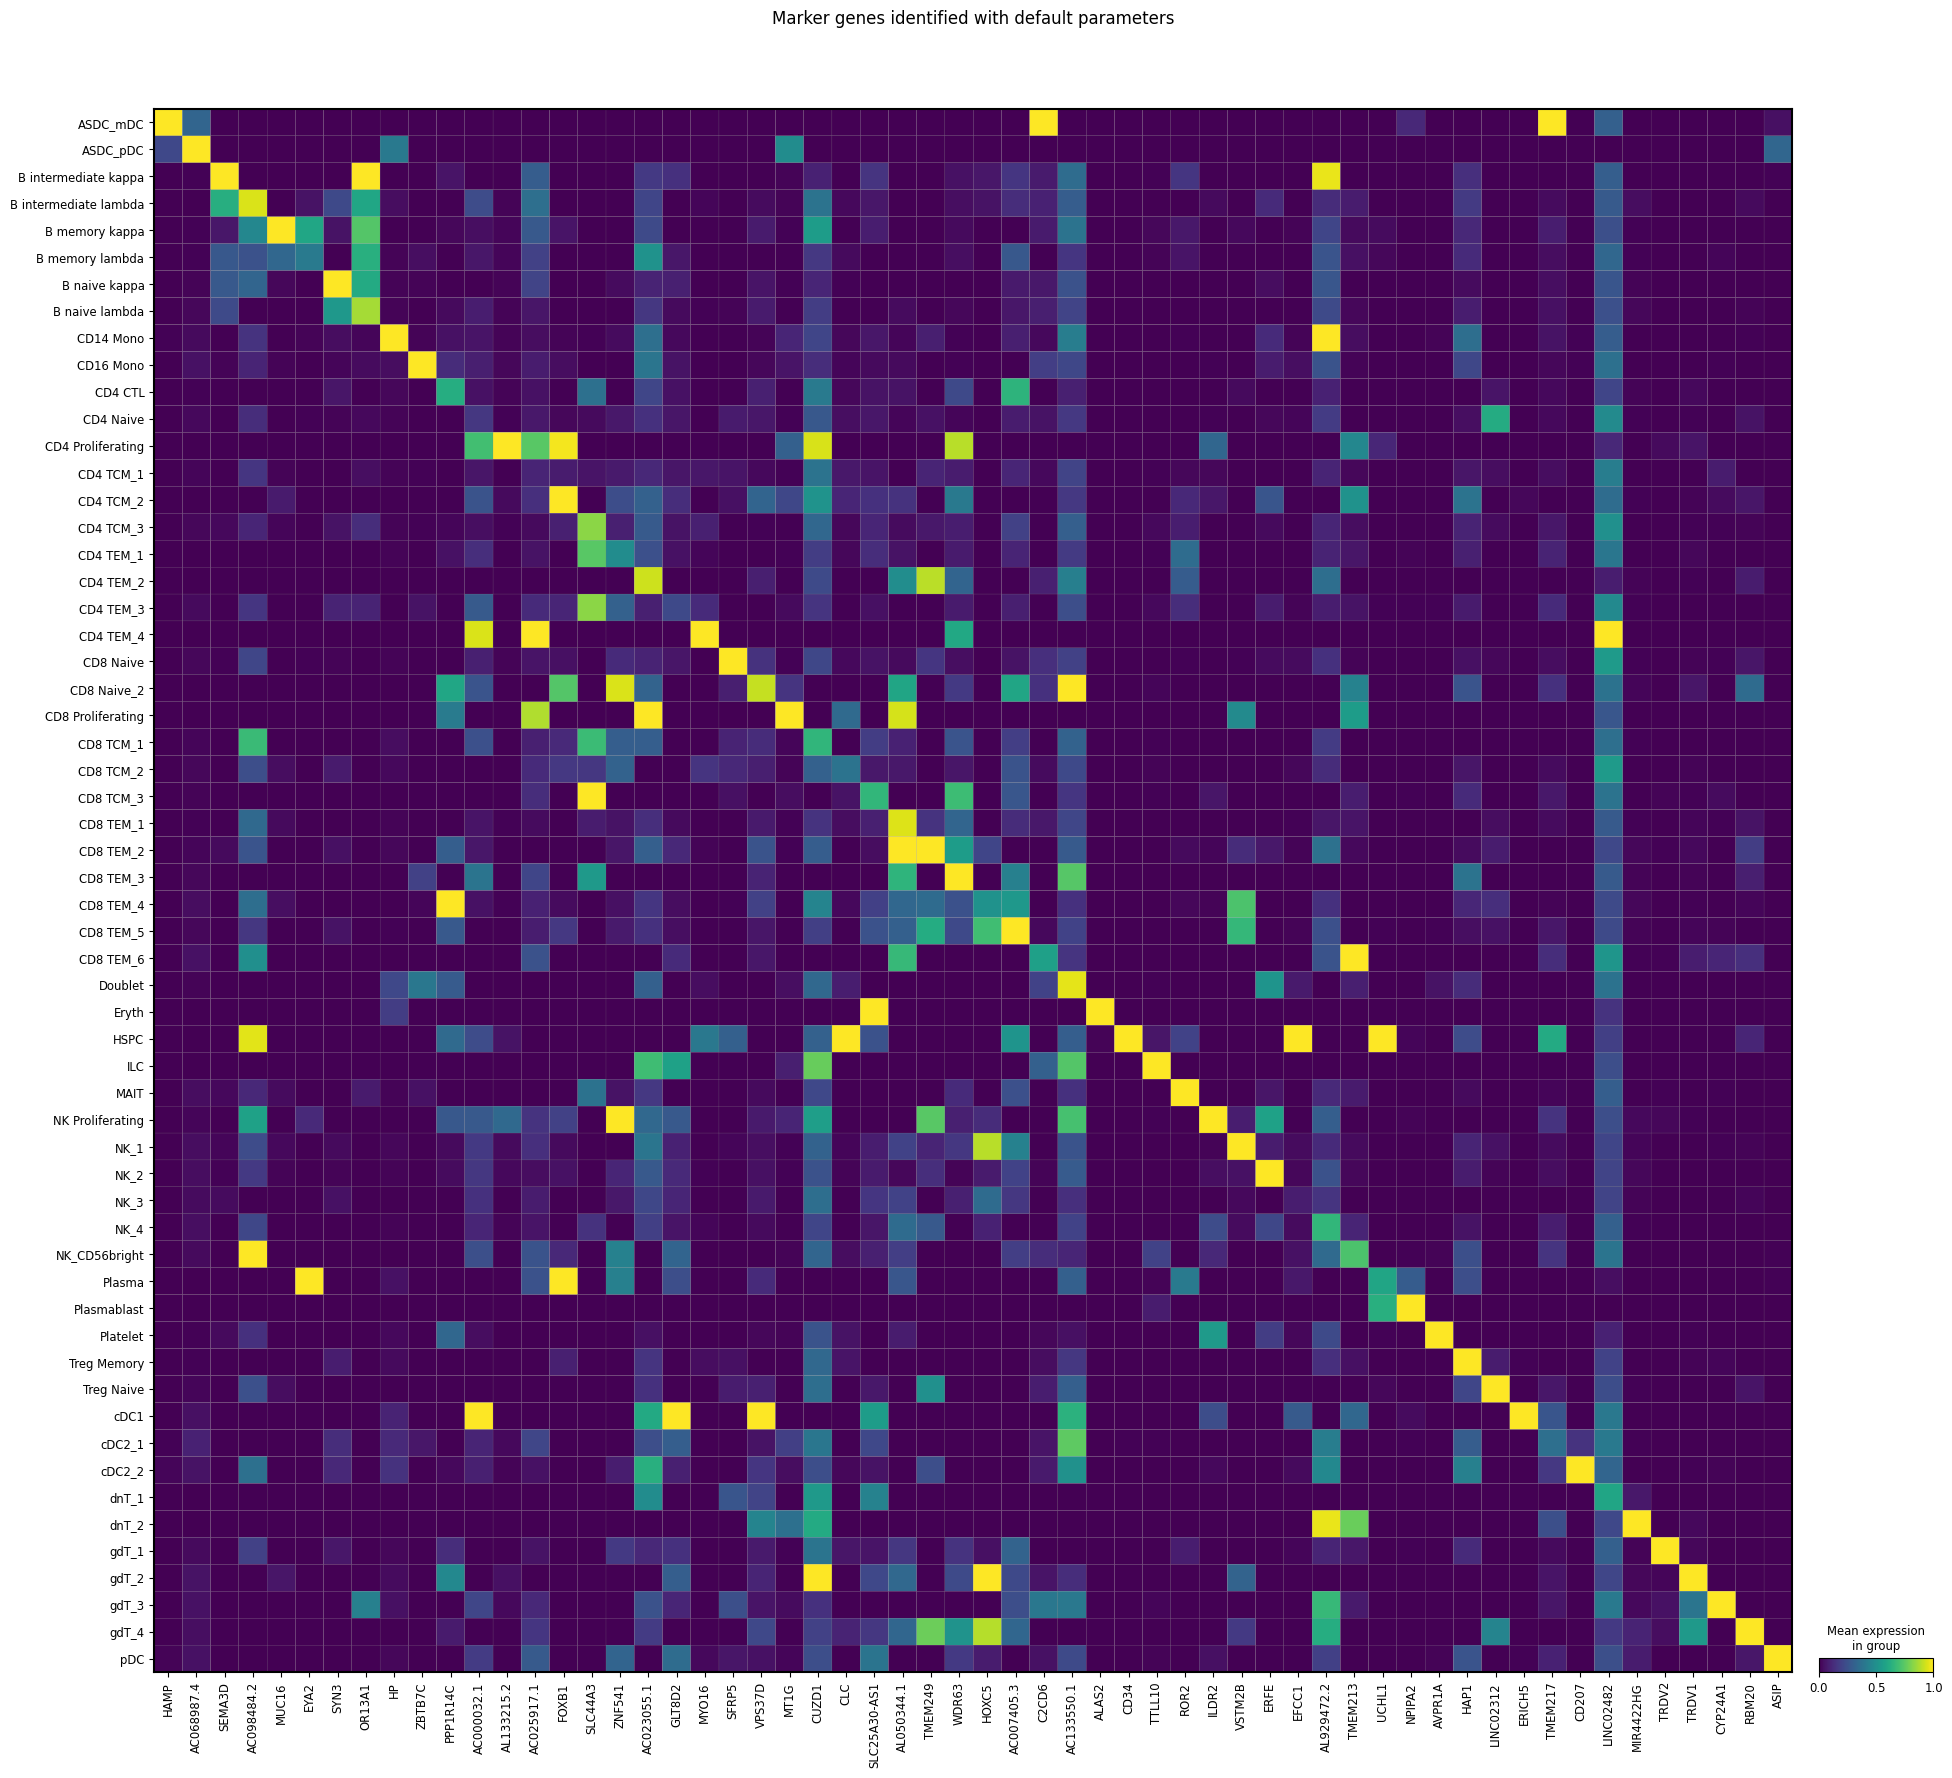

In [9]:
# Visualize marker genes with a heatmap
sherlock_default.plot_marker_heatmap(n_genes=1, title="Marker genes identified with default parameters")

## 4. Parameter Tuning

Now, let's explore the different parameters in ScSherlock and how they affect the results.

### 4.1 ScSherlockConfig Parameters Overview

Here are the main parameters that can be adjusted:

In [10]:
# Create a default config to examine the default values
default_config = ScSherlockConfig()

# Print all parameters
print("Default ScSherlock parameters:")
for param, value in default_config.__dict__.items():
    print(f"  {param}: {value}")

Default ScSherlock parameters:
  k_values: [1, 10, 25]
  scoring_method: ScoringMethod.DIFF
  aggregation_method: AggregationMethod.MEAN
  parameter_estimation: ParameterEstimation.PATIENT_MEDIAN
  max_genes_kept: 100
  min_patients: 3
  min_reads: 10
  min_cells: 10
  score_cutoff: 0.5
  n_simulations: 1000
  random_seed: 0
  sparse_step: 5
  promising_threshold: 0.1
  n_jobs: 1
  batch_size: 5


### 4.2 Scoring Methods

ScSherlock offers three different scoring methods:

1. **DIFF** - Maximizes the difference between sensitivity and false positive rate
2. **SENS_FPR_ZERO** - Maximizes sensitivity at zero false positive rate
3. **SENS_PPV_99** - Maximizes sensitivity at positive predictive value > 99%

Let's compare these scoring methods:

In [11]:
# Function to run ScSherlock with a specific scoring method
def run_with_scoring_method(scoring_method):
    # Create config with the specified scoring method
    config = ScSherlockConfig(
        scoring_method=scoring_method,
        # Use fewer k values and a higher cutoff for faster execution
        k_values=[1, 10],
        score_cutoff=0.4
    )
    
    # Initialize ScSherlock
    sherlock = ScSherlock(
        adata=adata,
        column_ctype='cell_type',
        column_patient='patient_id',
        config=config
    )
    
    # Run with theoretical method for speed
    print(f"Running with {scoring_method.value} scoring method...")
    start_time = time.time()
    markers = sherlock.run(method='theoric')
    end_time = time.time()
    print(f"Completed in {end_time - start_time:.2f} seconds")
    print(f"Identified {len(markers)} marker genes")
    
    return sherlock, markers

In [12]:
# Run with different scoring methods
sherlock_diff, markers_diff = run_with_scoring_method(ScoringMethod.DIFF)
sherlock_fpr, markers_fpr = run_with_scoring_method(ScoringMethod.SENS_FPR_ZERO)
sherlock_ppv, markers_ppv = run_with_scoring_method(ScoringMethod.SENS_PPV_99)

2025-03-26 11:30:31,883 - ScSherlock - INFO - Pre-filtering genes...
2025-03-26 11:30:31,884 - ScSherlock - INFO - Original dataset: 161764 cells, 20729 genes
2025-03-26 11:31:13,806 - ScSherlock - INFO - Filtered dataset: 161764 cells, 19498 genes
2025-03-26 11:31:13,807 - ScSherlock - INFO - Removed 1231 genes with low expression
2025-03-26 11:31:13,813 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 19498) data matrix
2025-03-26 11:31:13,813 - ScSherlock - INFO - Calculating theoretical scores...


Running with diff scoring method...


Aggregating Samples: 100%|███████████████████| 464/464 [00:00<00:00, 576.13it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
2025-03-26 11:31:16,565 - ScSherlock - INFO - Starting parallel processing with joblib
2025-03-26 11:32:16,639 - ScSherlock - INFO - Applying multi-category correction...
2025-03-26 11:32:16,667 - ScSherlock - INFO - Aggregating scores...
2025-03-26 11:32:16,747 - ScSherlock - INFO - Sorting scores...
2025-03-26 11:32:16,949 - ScSherlock - INFO - Identifying top markers...


{'CD14 Mono':             1            10    aggregated  exp_prop
HP        1.0  1.000000e+00  1.000000e+00  0.000022
SERPINB2  1.0  1.000000e+00  1.000000e+00  0.000015
MYO7A     1.0  1.000000e+00  1.000000e+00  0.000008
KCNJ15    1.0  1.000000e+00  1.000000e+00  0.000008
HTRA1     1.0  1.000000e+00  1.000000e+00  0.000007
...       ...           ...           ...       ...
RPL41     0.0 -5.456683e-17 -2.728341e-17  0.001443
RPS12     0.0 -7.643468e-17 -3.821734e-17  0.001327
RPL10     0.0 -8.882183e-17 -4.441091e-17  0.001375
RPL13     0.0 -1.162644e-16 -5.813219e-17  0.001391
RPS27     0.0 -1.080006e-15 -5.400029e-16  0.001303

[19498 rows x 4 columns], 'CD4 TCM_1':               1            10    aggregated      exp_prop
AC025917.1  1.0  1.000000e+00  1.000000e+00  6.170681e-07
CTAGE6      1.0  1.000000e+00  1.000000e+00  2.146960e-07
AC096711.2  1.0  1.000000e+00  1.000000e+00  2.146960e-07
AP006565.1  1.0  1.000000e+00  1.000000e+00  1.676282e-07
AC074138.1  1.0  1.000000e+00  1

2025-03-26 11:32:17,775 - ScSherlock - INFO - Pre-filtering genes...
2025-03-26 11:32:17,776 - ScSherlock - INFO - Original dataset: 161764 cells, 20729 genes
2025-03-26 11:33:02,016 - ScSherlock - INFO - Filtered dataset: 161764 cells, 19498 genes
2025-03-26 11:33:02,018 - ScSherlock - INFO - Removed 1231 genes with low expression
2025-03-26 11:33:02,024 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 19498) data matrix
2025-03-26 11:33:02,025 - ScSherlock - INFO - Calculating theoretical scores...


Running with sensFPRzero scoring method...


Aggregating Samples: 100%|███████████████████| 464/464 [00:00<00:00, 554.56it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
2025-03-26 11:33:04,830 - ScSherlock - INFO - Starting parallel processing with joblib
2025-03-26 11:34:05,128 - ScSherlock - INFO - Applying multi-category correction...
2025-03-26 11:34:05,155 - ScSherlock - INFO - Aggregating scores...
2025-03-26 11:34:05,232 - ScSherlock - INFO - Sorting scores...
2025-03-26 11:34:05,422 - ScSherlock - INFO - Identifying top markers...


{'CD14 Mono':               1   10  aggregated  exp_prop
CXCL8       1.0  1.0         1.0  0.000305
CRISPLD2    1.0  1.0         1.0  0.000108
CYP27A1     1.0  1.0         1.0  0.000078
LINC01001   1.0  1.0         1.0  0.000045
HP          1.0  1.0         1.0  0.000022
...         ...  ...         ...       ...
AC005790.1  0.0  0.0         0.0  0.000000
WWOX-AS1    0.0  0.0         0.0  0.000000
AC079336.5  0.0  0.0         0.0  0.000000
AC005757.1  0.0  0.0         0.0  0.000000
CHI3L1      0.0  0.0         0.0  0.000000

[19498 rows x 4 columns], 'CD4 TCM_1':                    1        10  aggregated      exp_prop
OR1A1       1.000000  1.000000    1.000000  1.650217e-07
TRBV15      1.000000  1.000000    1.000000  1.650217e-07
SPATA17     1.000000  1.000000    1.000000  1.363862e-07
AC022390.1  1.000000  0.991870    0.995935  8.852089e-07
TMEM45B     0.985297  0.996561    0.990929  1.826750e-05
...              ...       ...         ...           ...
AC005790.1  0.000000  0.000000 

2025-03-26 11:34:06,230 - ScSherlock - INFO - Pre-filtering genes...
2025-03-26 11:34:06,231 - ScSherlock - INFO - Original dataset: 161764 cells, 20729 genes
2025-03-26 11:34:16,707 - ScSherlock - INFO - Filtered dataset: 161764 cells, 19498 genes
2025-03-26 11:34:16,708 - ScSherlock - INFO - Removed 1231 genes with low expression
2025-03-26 11:34:16,714 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 19498) data matrix
2025-03-26 11:34:16,714 - ScSherlock - INFO - Calculating theoretical scores...


Running with sensPPV99 scoring method...


Aggregating Samples: 100%|███████████████████| 464/464 [00:00<00:00, 637.46it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
2025-03-26 11:34:19,384 - ScSherlock - INFO - Starting parallel processing with joblib
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:385: RuntimeWarning: divide by zero encountered in divide
  ppv = np.nan_to_num((1 - alpha) / (2 - alpha - beta))
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:385: RuntimeWarning: invalid value encountered in divide
  ppv = np.nan_to_num((1 - alpha) / (2 - alpha - beta))
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:385: RuntimeWarning: divi

{'CD14 Mono':               1   10  aggregated  exp_prop
CRISPLD2    1.0  1.0         1.0  0.000108
CYP27A1     1.0  1.0         1.0  0.000078
LINC01001   1.0  1.0         1.0  0.000045
HP          1.0  1.0         1.0  0.000022
C9orf47     1.0  1.0         1.0  0.000022
...         ...  ...         ...       ...
AC005790.1  0.0  0.0         0.0  0.000000
WWOX-AS1    0.0  0.0         0.0  0.000000
AC079336.5  0.0  0.0         0.0  0.000000
AC005757.1  0.0  0.0         0.0  0.000000
CHI3L1      0.0  0.0         0.0  0.000000

[19498 rows x 4 columns], 'CD4 TCM_1':               1   10  aggregated      exp_prop
NRN1L       1.0  1.0         1.0  8.156595e-07
TRBV15      1.0  1.0         1.0  1.650217e-07
SPATA17     1.0  1.0         1.0  1.363862e-07
AKAP12      1.0  1.0         1.0  2.383149e-06
AC022390.1  1.0  1.0         1.0  8.852089e-07
...         ...  ...         ...           ...
AC005790.1  0.0  0.0         0.0  0.000000e+00
WWOX-AS1    0.0  0.0         0.0  0.000000e+00
AC07933

In [13]:
# Compare marker overlap between scoring methods
diff_markers = set(markers_diff.values())
fpr_markers = set(markers_fpr.values())
ppv_markers = set(markers_ppv.values())

print("Marker overlap between scoring methods:")
print(f"DIFF and SENS_FPR_ZERO: {len(diff_markers.intersection(fpr_markers))} markers")
print(f"DIFF and SENS_PPV_99: {len(diff_markers.intersection(ppv_markers))} markers")
print(f"SENS_FPR_ZERO and SENS_PPV_99: {len(fpr_markers.intersection(ppv_markers))} markers")
print(f"Common to all methods: {len(diff_markers.intersection(fpr_markers).intersection(ppv_markers))} markers")

Marker overlap between scoring methods:
DIFF and SENS_FPR_ZERO: 21 markers
DIFF and SENS_PPV_99: 20 markers
SENS_FPR_ZERO and SENS_PPV_99: 36 markers
Common to all methods: 16 markers


2025-03-26 11:35:23,844 - ScSherlock - INFO - Plotting 58 genes for 58 cell types using theoric model
... storing 'orig.ident' as categorical
... storing 'lane' as categorical
... storing 'donor' as categorical
... storing 'time' as categorical
... storing 'celltype.l1' as categorical
... storing 'celltype.l2' as categorical
... storing 'celltype.l3' as categorical
... storing 'Phase' as categorical
... storing 'patient_id' as categorical


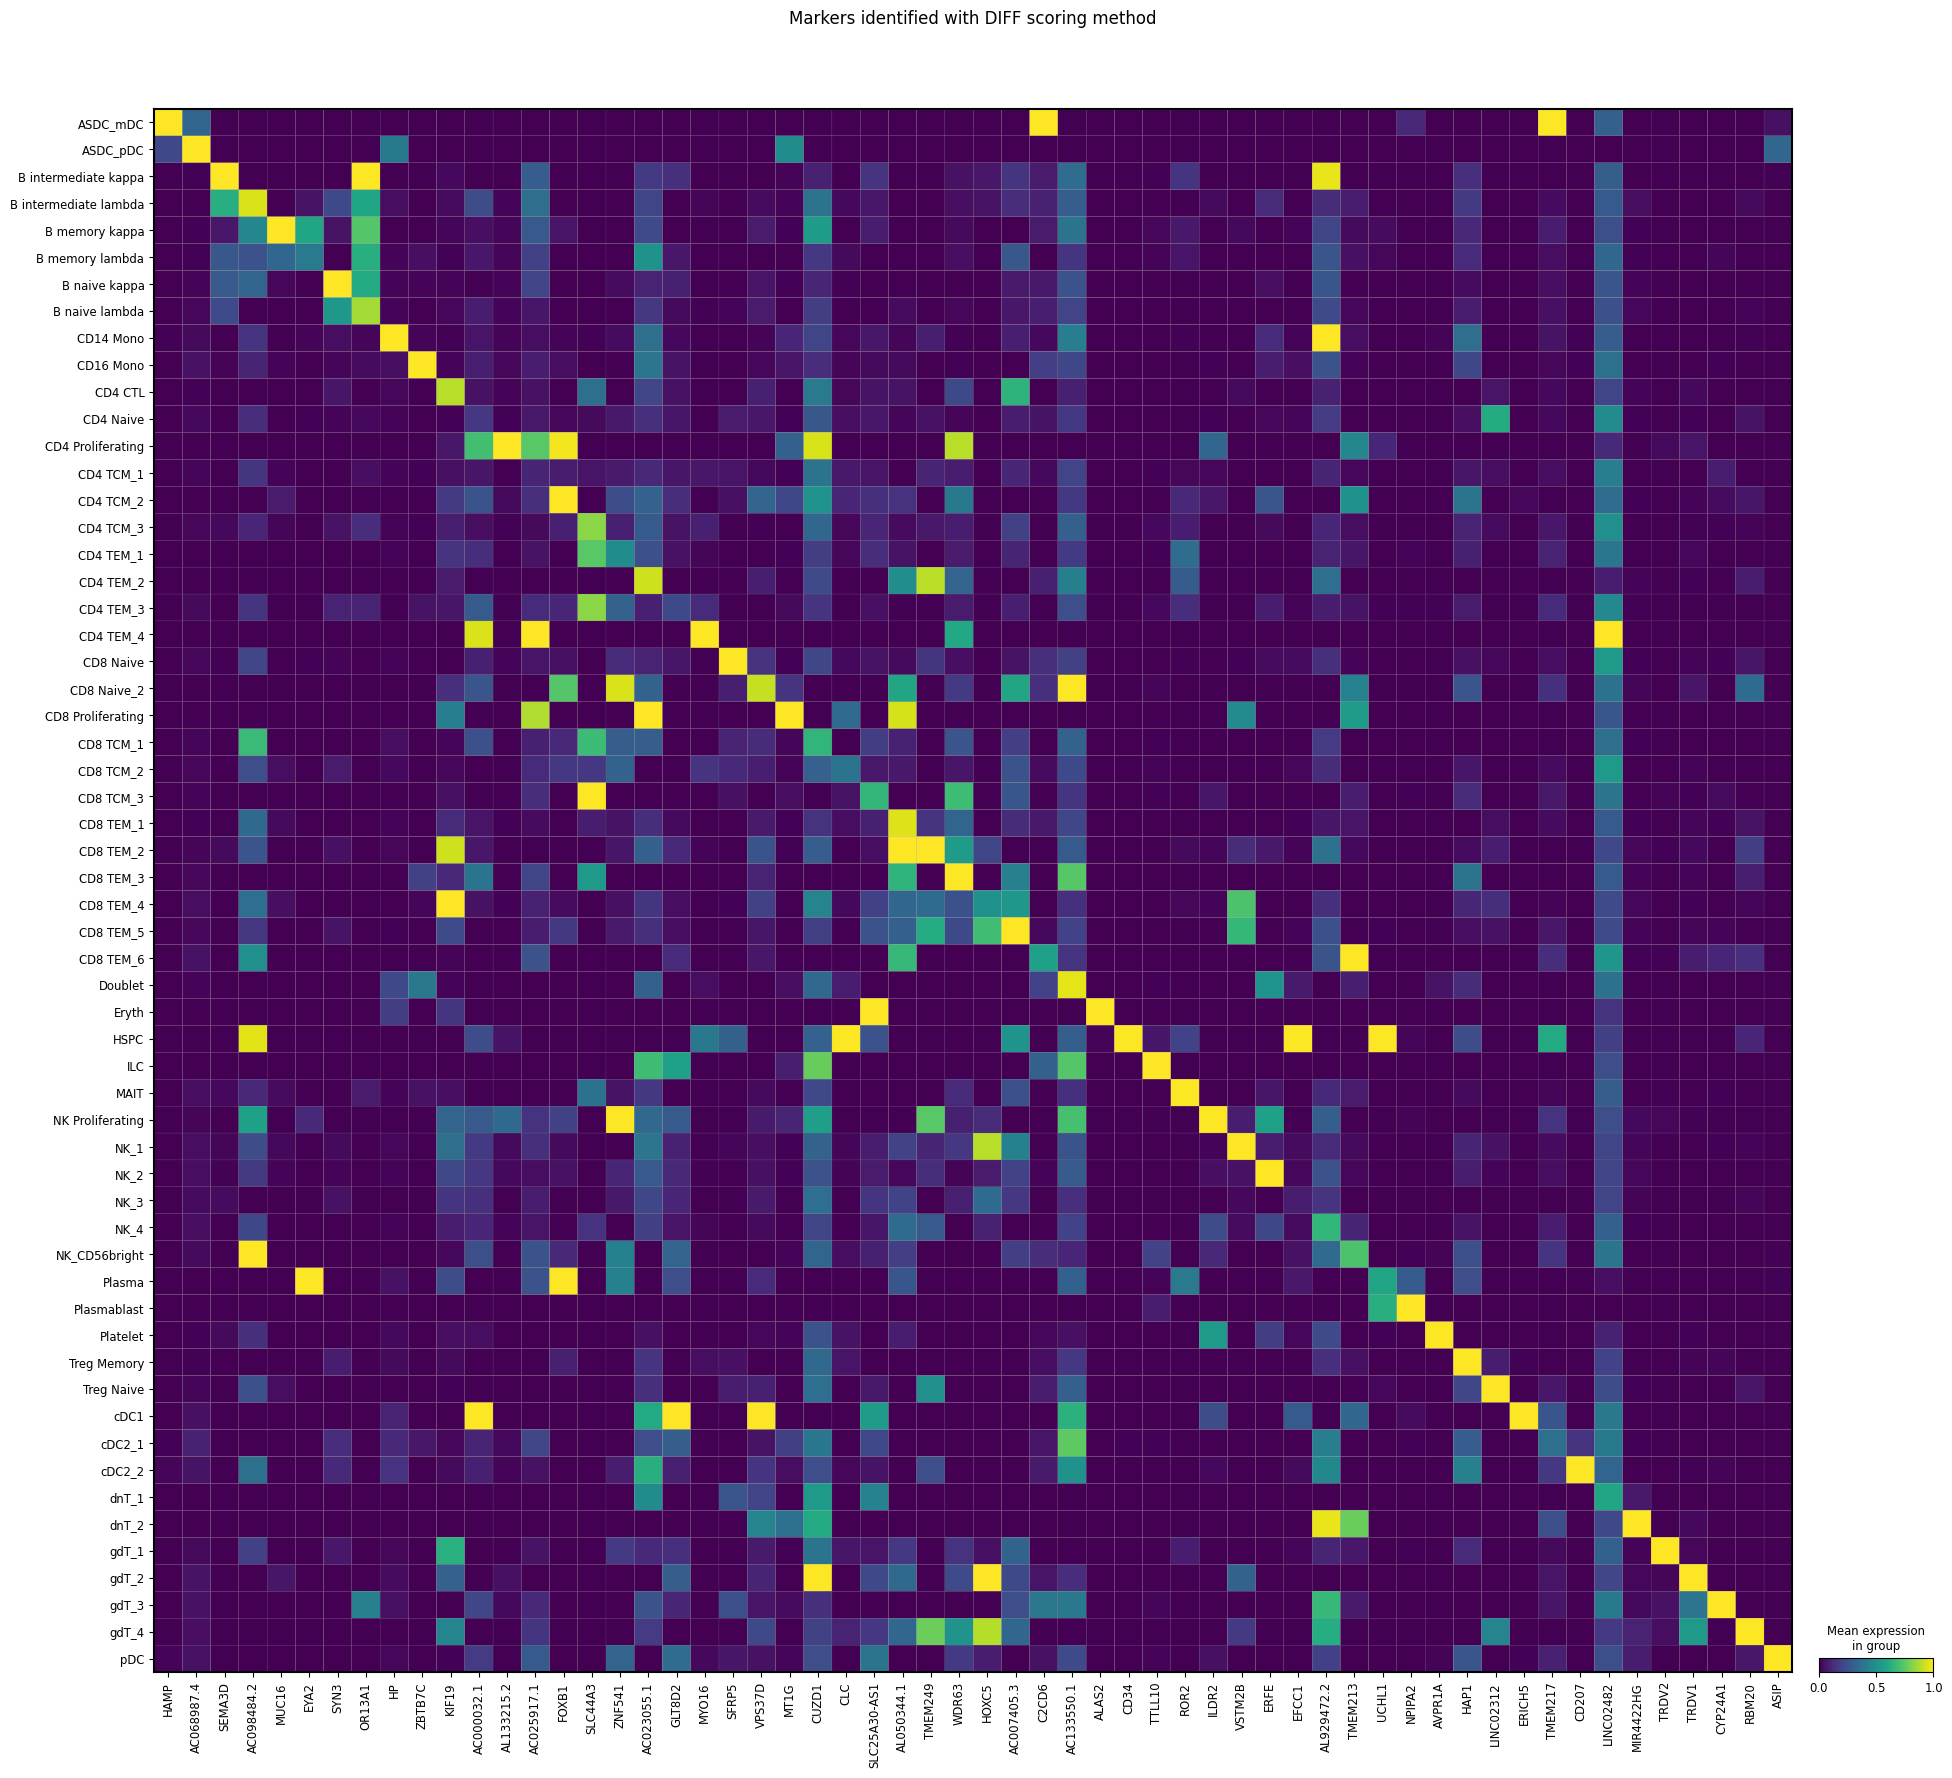

In [14]:
# Visualize markers identified with DIFF scoring method
sherlock_diff.plot_marker_heatmap(n_genes=1, title="Markers identified with DIFF scoring method")

### 4.3 k Values

The 'k' parameter in ScSherlock determines how many cells are aggregated for marker evaluation. Different k values can reveal different aspects of marker genes:

- Small k values (e.g., k=1): Focus on individual cell expression patterns
- Larger k values (e.g., k=10, 25, 50): Better represent tissue-level behavior

Let's experiment with different k values:

In [15]:
# Different k value combinations to test
k_combinations = [
    [1],              # Single cell level
    [1, 10, 25],      # Mix of single cell and small groups
    [10, 25, 50, 100]      # Larger groups
]

# Run ScSherlock with different k value combinations
k_results = {}

for k_vals in k_combinations:
    # Create config with specified k values
    config = ScSherlockConfig(
        k_values=k_vals,
        score_cutoff=0.4  # Higher cutoff for clearer results
    )
    
    # Initialize and run ScSherlock
    sherlock_k = ScSherlock(
        adata=adata,
        column_ctype='cell_type',
        column_patient='patient_id',
        config=config
    )
    
    # Run with theoretical method for speed
    print(f"Running with k values {k_vals}...")
    markers = sherlock_k.run(method='theoric')
    print(f"Identified {len(markers)} marker genes")
    
    # Store results
    k_results[str(k_vals)] = {
        'sherlock': sherlock_k,
        'markers': markers
    }

2025-03-26 11:35:26,042 - ScSherlock - INFO - Pre-filtering genes...
2025-03-26 11:35:26,043 - ScSherlock - INFO - Original dataset: 161764 cells, 20729 genes
2025-03-26 11:36:09,808 - ScSherlock - INFO - Filtered dataset: 161764 cells, 19498 genes
2025-03-26 11:36:09,810 - ScSherlock - INFO - Removed 1231 genes with low expression
2025-03-26 11:36:09,816 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 19498) data matrix
2025-03-26 11:36:09,817 - ScSherlock - INFO - Calculating theoretical scores...


Running with k values [1]...


Aggregating Samples: 100%|███████████████████| 464/464 [00:00<00:00, 610.31it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
2025-03-26 11:36:12,533 - ScSherlock - INFO - Starting parallel processing with joblib
2025-03-26 11:36:41,374 - ScSherlock - INFO - Applying multi-category correction...
2025-03-26 11:36:41,391 - ScSherlock - INFO - Aggregating scores...
2025-03-26 11:36:41,463 - ScSherlock - INFO - Sorting scores...
2025-03-26 11:36:41,650 - ScSherlock - INFO - Identifying top markers...


{'CD14 Mono':               1  aggregated  exp_prop
HP          1.0         1.0  0.000022
SERPINB2    1.0         1.0  0.000015
MYO7A       1.0         1.0  0.000008
KCNJ15      1.0         1.0  0.000008
HTRA1       1.0         1.0  0.000007
...         ...         ...       ...
AC005790.1  0.0         0.0  0.000000
WWOX-AS1    0.0         0.0  0.000000
AC079336.5  0.0         0.0  0.000000
AC005757.1  0.0         0.0  0.000000
CHI3L1      0.0         0.0  0.000000

[19498 rows x 3 columns], 'CD4 TCM_1':               1  aggregated      exp_prop
AC025917.1  1.0         1.0  6.170681e-07
CTAGE6      1.0         1.0  2.146960e-07
AC096711.2  1.0         1.0  2.146960e-07
AP006565.1  1.0         1.0  1.676282e-07
AC074138.1  1.0         1.0  1.650217e-07
...         ...         ...           ...
AC005790.1  0.0         0.0  0.000000e+00
WWOX-AS1    0.0         0.0  0.000000e+00
AC079336.5  0.0         0.0  0.000000e+00
AC005757.1  0.0         0.0  0.000000e+00
CHI3L1      0.0         0.0 

2025-03-26 11:36:42,443 - ScSherlock - INFO - Pre-filtering genes...
2025-03-26 11:36:42,445 - ScSherlock - INFO - Original dataset: 161764 cells, 20729 genes
2025-03-26 11:37:20,734 - ScSherlock - INFO - Filtered dataset: 161764 cells, 19498 genes
2025-03-26 11:37:20,737 - ScSherlock - INFO - Removed 1231 genes with low expression
2025-03-26 11:37:20,742 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 19498) data matrix
2025-03-26 11:37:20,743 - ScSherlock - INFO - Calculating theoretical scores...


Running with k values [1, 10, 25]...


Aggregating Samples: 100%|███████████████████| 464/464 [00:00<00:00, 640.01it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
2025-03-26 11:37:23,488 - ScSherlock - INFO - Starting parallel processing with joblib
2025-03-26 11:38:56,697 - ScSherlock - INFO - Applying multi-category correction...
2025-03-26 11:38:56,726 - ScSherlock - INFO - Aggregating scores...
2025-03-26 11:38:56,803 - ScSherlock - INFO - Sorting scores...
2025-03-26 11:38:57,009 - ScSherlock - INFO - Identifying top markers...


{'CD14 Mono':             1            10            25    aggregated  exp_prop
HP        1.0  1.000000e+00  1.000000e+00  1.000000e+00  0.000022
SERPINB2  1.0  1.000000e+00  1.000000e+00  1.000000e+00  0.000015
MYO7A     1.0  1.000000e+00  1.000000e+00  1.000000e+00  0.000008
KCNJ15    1.0  1.000000e+00  1.000000e+00  1.000000e+00  0.000008
HTRA1     1.0  1.000000e+00  1.000000e+00  1.000000e+00  0.000007
...       ...           ...           ...           ...       ...
RPS27     0.0 -1.080006e-15 -7.247690e-37 -3.600019e-16  0.001303
HNRNPA1   0.0  0.000000e+00 -2.873384e-15 -9.577948e-16  0.000500
NPM1      0.0  0.000000e+00 -6.509281e-15 -2.169760e-15  0.000370
CALM1     0.0  0.000000e+00 -1.292431e-14 -4.308103e-15  0.000468
KLF2      0.0  0.000000e+00 -3.252211e-14 -1.084070e-14  0.000386

[19498 rows x 5 columns], 'CD4 TCM_1':               1   10            25    aggregated      exp_prop
AC025917.1  1.0  1.0  1.000000e+00  1.000000e+00  6.170681e-07
CTAGE6      1.0  1.0  1.0000

2025-03-26 11:38:57,837 - ScSherlock - INFO - Pre-filtering genes...
2025-03-26 11:38:57,839 - ScSherlock - INFO - Original dataset: 161764 cells, 20729 genes
2025-03-26 11:39:18,551 - ScSherlock - INFO - Filtered dataset: 161764 cells, 19498 genes
2025-03-26 11:39:18,553 - ScSherlock - INFO - Removed 1231 genes with low expression
2025-03-26 11:39:18,559 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 19498) data matrix
2025-03-26 11:39:18,560 - ScSherlock - INFO - Calculating theoretical scores...


Running with k values [10, 25, 50, 100]...


Aggregating Samples: 100%|███████████████████| 464/464 [00:00<00:00, 646.15it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
2025-03-26 11:39:21,306 - ScSherlock - INFO - Starting parallel processing with joblib
2025-03-26 11:41:36,500 - ScSherlock - INFO - Applying multi-category correction...
2025-03-26 11:41:36,544 - ScSherlock - INFO - Aggregating scores...
2025-03-26 11:41:36,623 - ScSherlock - INFO - Sorting scores...
2025-03-26 11:41:36,825 - ScSherlock - INFO - Identifying top markers...


{'CD14 Mono':            10   25            50       100  aggregated  exp_prop
HP        1.0  1.0  1.000000e+00  1.000000    1.000000  0.000022
SERPINB2  1.0  1.0  1.000000e+00  1.000000    1.000000  0.000015
MYO7A     1.0  1.0  1.000000e+00  1.000000    1.000000  0.000008
KCNJ15    1.0  1.0  1.000000e+00  1.000000    1.000000  0.000008
HTRA1     1.0  1.0  1.000000e+00  1.000000    1.000000  0.000007
...       ...  ...           ...       ...         ...       ...
CD2       0.0  0.0 -3.581825e-18 -0.000232   -0.000058  0.000018
CD3E      0.0  0.0 -6.735784e-12 -0.000250   -0.000063  0.000018
SYNE2     0.0  0.0 -1.302346e-16 -0.000261   -0.000065  0.000018
CD3G      0.0  0.0 -1.179612e-14 -0.000297   -0.000074  0.000014
TRAC      0.0  0.0 -6.983612e-16 -0.000333   -0.000083  0.000013

[19498 rows x 6 columns], 'CD4 TCM_1':              10   25            50       100    aggregated      exp_prop
AC025917.1  1.0  1.0  1.000000e+00  1.000000  1.000000e+00  6.170681e-07
CTAGE6      1.0  1.0

In [16]:
# Compare marker overlap between k value combinations
print("Marker overlap between k value combinations:")
for i, k1 in enumerate(k_combinations):
    for j, k2 in enumerate(k_combinations[i+1:], i+1):
        set1 = set(k_results[str(k1)]['markers'].values())
        set2 = set(k_results[str(k2)]['markers'].values())
        overlap = len(set1.intersection(set2))
        
        print(f"k={k1} and k={k2}: {overlap} markers in common")

Marker overlap between k value combinations:
k=[1] and k=[1, 10, 25]: 54 markers in common
k=[1] and k=[10, 25, 50, 100]: 53 markers in common
k=[1, 10, 25] and k=[10, 25, 50, 100]: 53 markers in common


2025-03-26 11:41:39,320 - ScSherlock - INFO - Plotting 58 genes for 58 cell types using theoric model
... storing 'orig.ident' as categorical
... storing 'lane' as categorical
... storing 'donor' as categorical
... storing 'time' as categorical
... storing 'celltype.l1' as categorical
... storing 'celltype.l2' as categorical
... storing 'celltype.l3' as categorical
... storing 'Phase' as categorical
... storing 'patient_id' as categorical


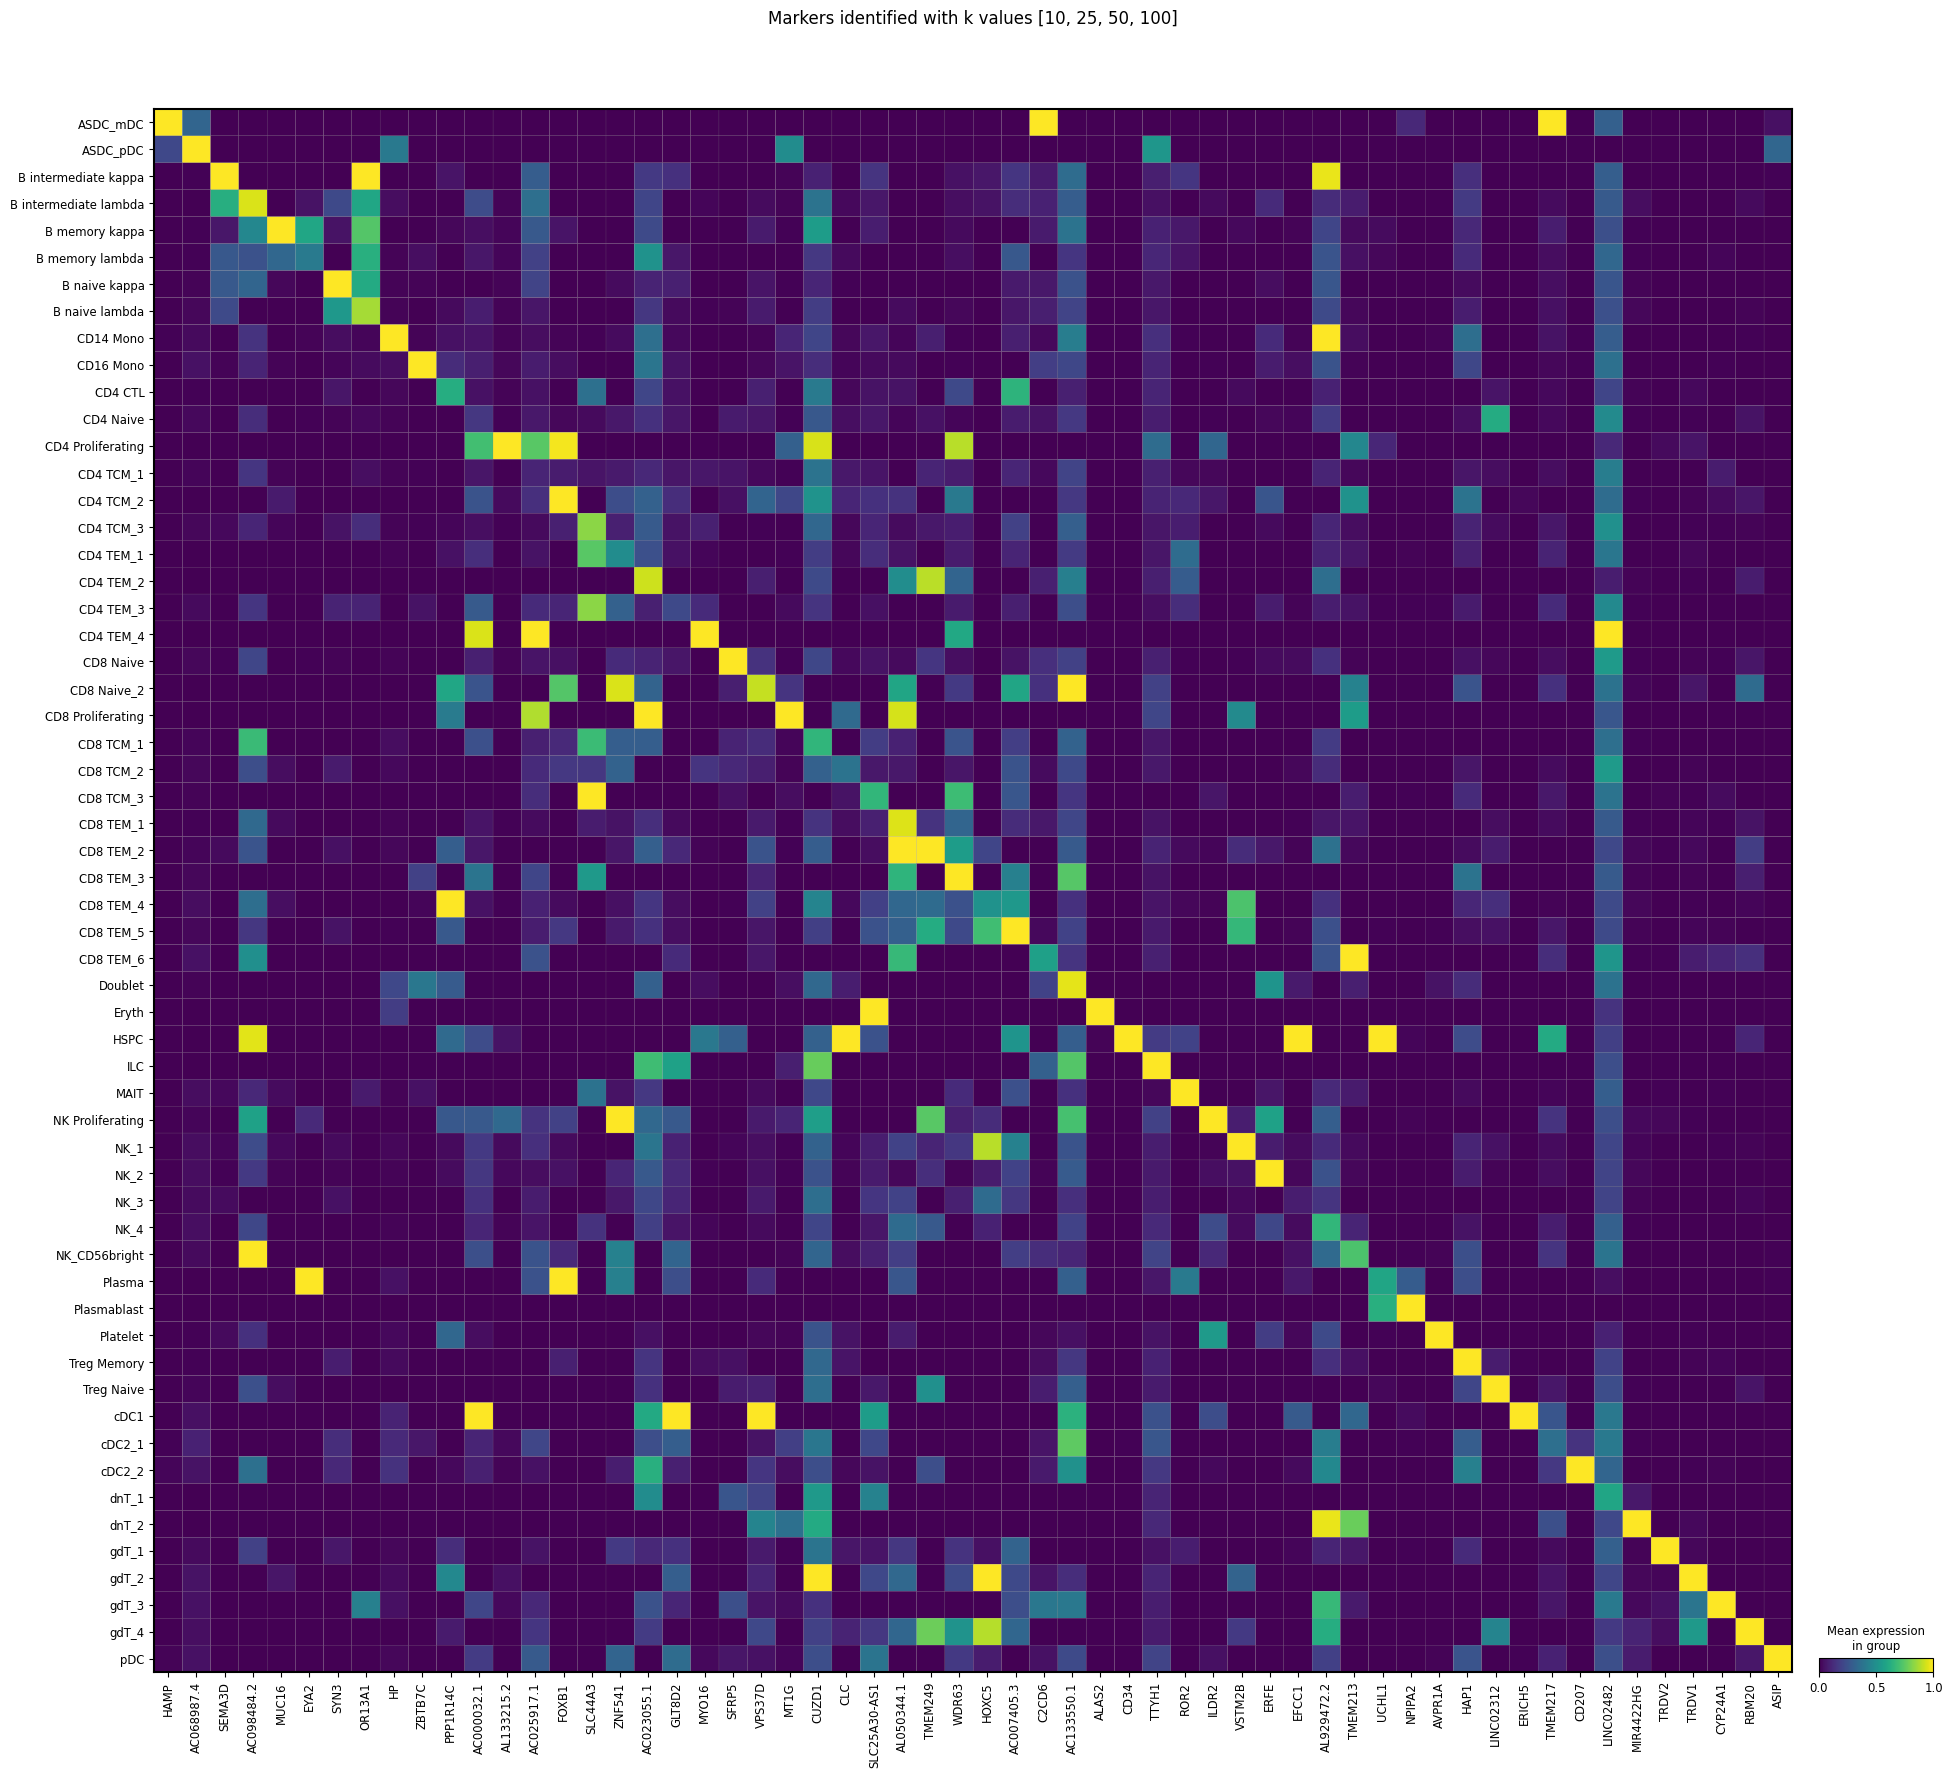

In [17]:
# Visualize markers for one of the k value combinations
k_vals = k_combinations[2]  # Using the third combination [1, 10, 25]
k_results[str(k_vals)]['sherlock'].plot_marker_heatmap(
    n_genes=1, 
    title=f"Markers identified with k values {k_vals}"
)

### 4.4 Theoretical vs. Empirical Method

ScSherlock offers two methods for marker identification:

1. **Theoretical** (method='theoric') - Uses binomial distribution to model gene expression
2. **Empirical** (method='empiric') - Uses simulation to directly estimate scores

The theoretical method is faster, while the empirical method is generally more accurate but slower. Let's compare them:

In [18]:
# Create configuration for comparison
config = ScSherlockConfig(
    k_values=[1, 10, 100],     # Use fewer k values for faster execution
    n_simulations=500,    # Reduced number of simulations for speed
    n_jobs=4              # Use parallel processing if multiple cores available
)

# Initialize ScSherlock
sherlock_methods = ScSherlock(
    adata=adata,
    column_ctype='cell_type',
    column_patient='patient_id',
    config=config
)

# Run with theoretical method
print("Running with theoretical method...")
start_time = time.time()
markers_theoric = sherlock_methods.run(method='theoric')
theoric_time = time.time() - start_time
print(f"Theoretical method completed in {theoric_time:.2f} seconds")
print(f"Identified {len(markers_theoric)} marker genes")

# Run with empirical method
print("\nRunning with empirical method...")
start_time = time.time()
markers_empiric = sherlock_methods.run(method='empiric')
empiric_time = time.time() - start_time
print(f"Empirical method completed in {empiric_time:.2f} seconds")
print(f"Identified {len(markers_empiric)} marker genes")

# Compare timing
print(f"\nEmpirical method took {empiric_time/theoric_time:.1f}x longer than theoretical method")

2025-03-26 11:41:41,529 - ScSherlock - INFO - Pre-filtering genes...
2025-03-26 11:41:41,530 - ScSherlock - INFO - Original dataset: 161764 cells, 20729 genes
2025-03-26 11:43:00,694 - ScSherlock - INFO - Filtered dataset: 161764 cells, 19498 genes
2025-03-26 11:43:00,697 - ScSherlock - INFO - Removed 1231 genes with low expression
2025-03-26 11:43:00,706 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 19498) data matrix
2025-03-26 11:43:00,707 - ScSherlock - INFO - Calculating theoretical scores...


Running with theoretical method...


Aggregating Samples: 100%|████████████████████| 464/464 [00:05<00:00, 77.41it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
2025-03-26 11:43:08,657 - ScSherlock - INFO - Starting parallel processing with joblib
2025-03-26 11:44:12,161 - ScSherlock - INFO - Applying multi-category correction...
2025-03-26 11:44:12,325 - ScSherlock - INFO - Aggregating scores...
2025-03-26 11:44:12,406 - ScSherlock - INFO - Sorting scores...
2025-03-26 11:44:12,637 - ScSherlock - INFO - Identifying top markers...
2025-03-26 11:44:12,708 - ScSherlock - INFO - Calculating theoretical scores...


{'CD14 Mono':             1   10       100  aggregated  exp_prop
HP        1.0  1.0  1.000000    1.000000  0.000022
SERPINB2  1.0  1.0  1.000000    1.000000  0.000015
MYO7A     1.0  1.0  1.000000    1.000000  0.000008
KCNJ15    1.0  1.0  1.000000    1.000000  0.000008
HTRA1     1.0  1.0  1.000000    1.000000  0.000007
...       ...  ...       ...         ...       ...
CD2       0.0  0.0 -0.000232   -0.000077  0.000018
CD3E      0.0  0.0 -0.000250   -0.000083  0.000018
SYNE2     0.0  0.0 -0.000261   -0.000087  0.000018
CD3G      0.0  0.0 -0.000297   -0.000099  0.000014
TRAC      0.0  0.0 -0.000333   -0.000111  0.000013

[19498 rows x 5 columns], 'CD4 TCM_1':               1   10       100  aggregated      exp_prop
AC025917.1  1.0  1.0  1.000000    1.000000  6.170681e-07
CTAGE6      1.0  1.0  1.000000    1.000000  2.146960e-07
AC096711.2  1.0  1.0  1.000000    1.000000  2.146960e-07
AP006565.1  1.0  1.0  1.000000    1.000000  1.676282e-07
AC074138.1  1.0  1.0  1.000000    1.000000  1.650

Aggregating Samples: 100%|███████████████████| 464/464 [00:00<00:00, 701.47it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
2025-03-26 11:44:15,300 - ScSherlock - INFO - Starting parallel processing with joblib
/home/croizer/.conda/envs/scsherlock/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/croizer/.conda/envs/scsherlock/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were giv

{'CD14 Mono':                    1        10       100  aggregated      exp_prop
LINC02218  -0.017468  1.000000  1.000000    0.660844  6.776172e-07
PPARGC1A   -0.018266  1.000000  1.000000    0.660578  5.161599e-07
IGSF23     -0.015123  1.000000  0.989583    0.658153  5.076505e-07
AC009974.1 -0.048360  1.000000  0.990741    0.647460  2.287660e-06
ST6GALNAC2 -0.031222  0.962963  0.918660    0.616801  1.041271e-06
...              ...       ...       ...         ...           ...
SNORC      -0.014769  0.040541  0.028205    0.017992  5.959779e-07
AL031709.1 -0.015876  0.028340  0.036625    0.016363  5.684794e-07
CRX        -0.028628  0.037681  0.038417    0.015823  8.525007e-07
AC007216.4 -0.009318  0.000000  0.038585    0.009756  5.316721e-07
AC008115.4 -0.008548  0.018349  0.004042    0.004614  5.610178e-07

[100 rows x 5 columns], 'CD4 TCM_1':                    1        10       100  aggregated      exp_prop
AKAP12     -0.066941  0.363636  0.330309    0.209001  2.383149e-06
CERS3     

In [19]:
# Compare marker overlap between theoretical and empirical methods
theoric_set = set(markers_theoric.values())
empiric_set = set(markers_empiric.values())
overlap = len(theoric_set.intersection(empiric_set))

print(f"Markers in common between theoretical and empirical methods: {overlap}")
print(f"Unique to theoretical method: {len(theoric_set - empiric_set)} markers")
print(f"Unique to empirical method: {len(empiric_set - theoric_set)} markers")

Markers in common between theoretical and empirical methods: 5
Unique to theoretical method: 47 markers
Unique to empirical method: 12 markers


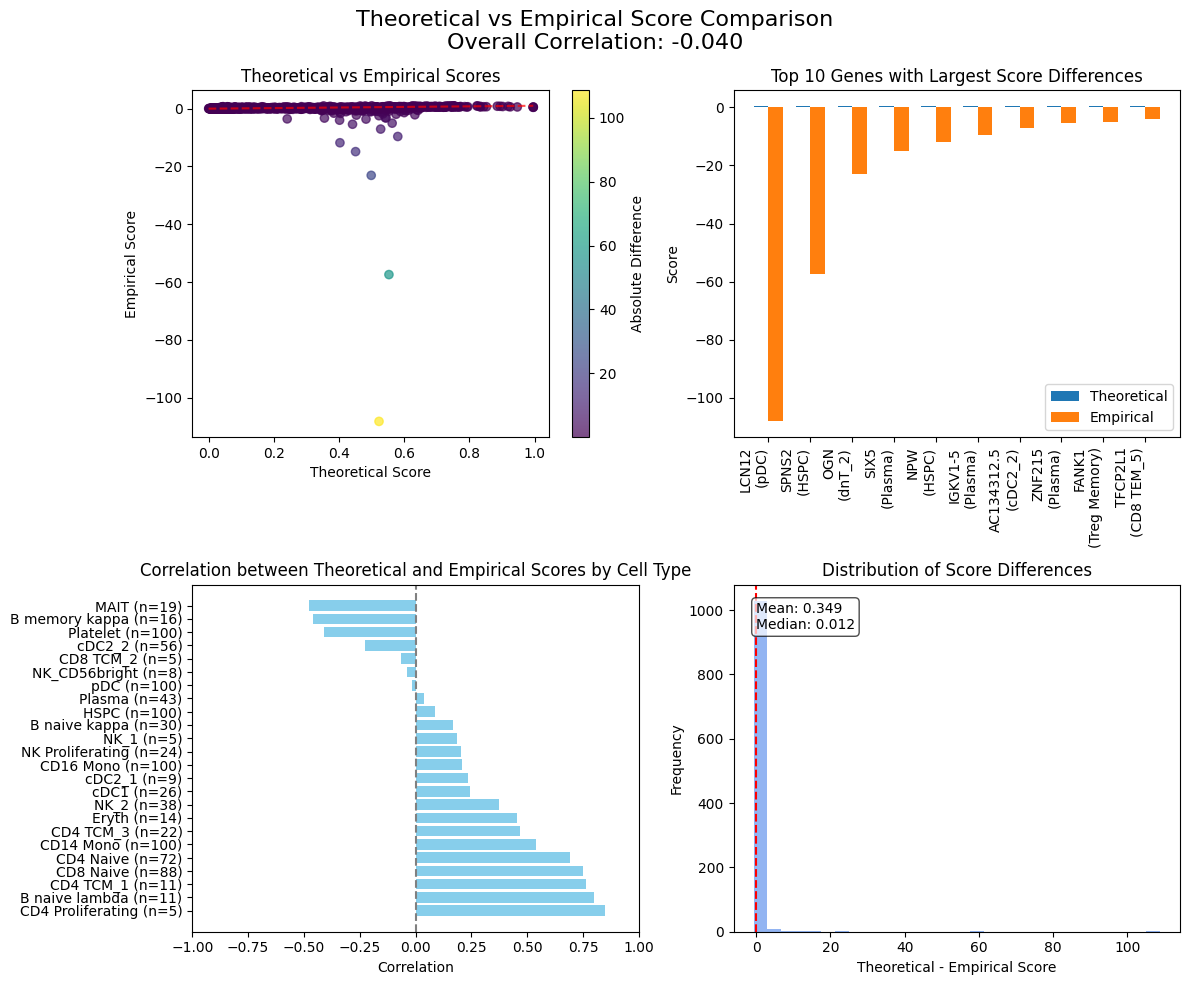

In [20]:
# If available, visualize comparison between theoretical and empirical scores
if hasattr(sherlock_methods, 'plot_theoretical_vs_empirical'):
    sherlock_methods.plot_theoretical_vs_empirical(n_genes=10)

### 4.5 Filtering Parameters

ScSherlock has several parameters that control filtering of potential marker genes:

- `max_genes_kept`: Maximum number of genes kept per cell type
- `min_patients`: Minimum number of patients expressing the gene
- `min_reads`: Minimum number of reads required
- `min_cells`: Minimum number of cells expressing the gene
- `score_cutoff`: Score threshold for considering a gene as a marker

Let's experiment with different filtering criteria:

In [21]:
# Create a configuration with relaxed filtering
relaxed_config = ScSherlockConfig(
    k_values=[1, 10],
    max_genes_kept=200,  # Keep more genes
    min_patients=2,      # Require fewer patients
    min_reads=5,         # Lower read threshold
    min_cells=5,         # Fewer cells required
    score_cutoff=0.3     # Lower score threshold
)

# Create a configuration with strict filtering
strict_config = ScSherlockConfig(
    k_values=[1, 10],
    max_genes_kept=50,   # Keep fewer genes
    min_patients=3,      # Require more patients
    min_reads=20,        # Higher read threshold
    min_cells=20,        # More cells required
    score_cutoff=0.6     # Higher score threshold
)

# Run with relaxed filtering
print("Running with relaxed filtering...")
sherlock_relaxed = ScSherlock(adata=adata, column_ctype='cell_type', column_patient='patient_id', config=relaxed_config)
markers_relaxed = sherlock_relaxed.run(method='theoric')
print(f"Identified {len(markers_relaxed)} marker genes")

# Run with strict filtering
print("\nRunning with strict filtering...")
sherlock_strict = ScSherlock(adata=adata, column_ctype='cell_type', column_patient='patient_id', config=strict_config)
markers_strict = sherlock_strict.run(method='theoric')
print(f"Identified {len(markers_strict)} marker genes")

Running with relaxed filtering...


2025-03-26 12:40:37,923 - ScSherlock - INFO - Pre-filtering genes...
2025-03-26 12:40:37,924 - ScSherlock - INFO - Original dataset: 161764 cells, 20729 genes
2025-03-26 12:43:32,232 - ScSherlock - INFO - Filtered dataset: 161764 cells, 20049 genes
2025-03-26 12:43:32,235 - ScSherlock - INFO - Removed 680 genes with low expression
2025-03-26 12:43:32,244 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 20049) data matrix
2025-03-26 12:43:32,245 - ScSherlock - INFO - Calculating theoretical scores...
Aggregating Samples: 100%|████████████████████| 464/464 [00:05<00:00, 78.66it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).si

{'CD14 Mono':             1            10    aggregated  exp_prop
HP        1.0  1.000000e+00  1.000000e+00  0.000022
SERPINB2  1.0  1.000000e+00  1.000000e+00  0.000015
MYO7A     1.0  1.000000e+00  1.000000e+00  0.000008
KCNJ15    1.0  1.000000e+00  1.000000e+00  0.000008
HTRA1     1.0  1.000000e+00  1.000000e+00  0.000007
...       ...           ...           ...       ...
RPL41     0.0 -5.459052e-17 -2.729526e-17  0.001443
RPS12     0.0 -7.643498e-17 -3.821749e-17  0.001327
RPL10     0.0 -8.882036e-17 -4.441018e-17  0.001375
RPL13     0.0 -1.162616e-16 -5.813078e-17  0.001391
RPS27     0.0 -1.080007e-15 -5.400037e-16  0.001303

[20049 rows x 4 columns], 'CD4 TCM_1':               1            10    aggregated      exp_prop
AC025917.1  1.0  1.000000e+00  1.000000e+00  6.170666e-07
CTAGE6      1.0  1.000000e+00  1.000000e+00  2.146939e-07
AC096711.2  1.0  1.000000e+00  1.000000e+00  2.146939e-07
AP006565.1  1.0  1.000000e+00  1.000000e+00  1.676279e-07
AC074138.1  1.0  1.000000e+00  1

2025-03-26 12:44:42,785 - ScSherlock - INFO - Pre-filtering genes...
2025-03-26 12:44:42,786 - ScSherlock - INFO - Original dataset: 161764 cells, 20729 genes
2025-03-26 12:46:04,848 - ScSherlock - INFO - Filtered dataset: 161764 cells, 18844 genes
2025-03-26 12:46:04,850 - ScSherlock - INFO - Removed 1885 genes with low expression
2025-03-26 12:46:04,859 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 18844) data matrix
2025-03-26 12:46:04,860 - ScSherlock - INFO - Calculating theoretical scores...
Aggregating Samples: 100%|████████████████████| 464/464 [00:05<00:00, 79.15it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).s

{'CD14 Mono':             1            10    aggregated  exp_prop
HP        1.0  1.000000e+00  1.000000e+00  0.000022
SERPINB2  1.0  1.000000e+00  1.000000e+00  0.000015
MYO7A     1.0  1.000000e+00  1.000000e+00  0.000008
KCNJ15    1.0  1.000000e+00  1.000000e+00  0.000008
HTRA1     1.0  1.000000e+00  1.000000e+00  0.000007
...       ...           ...           ...       ...
RPL41     0.0 -5.458574e-17 -2.729287e-17  0.001444
RPS12     0.0 -7.643330e-17 -3.821665e-17  0.001327
RPL10     0.0 -8.880807e-17 -4.440404e-17  0.001375
RPL13     0.0 -1.162613e-16 -5.813066e-17  0.001391
RPS27     0.0 -1.080073e-15 -5.400364e-16  0.001303

[18844 rows x 4 columns], 'CD4 TCM_1':               1            10    aggregated      exp_prop
AC025917.1  1.0  1.000000e+00  1.000000e+00  6.170742e-07
CTAGE6      1.0  1.000000e+00  1.000000e+00  2.147020e-07
AC096711.2  1.0  1.000000e+00  1.000000e+00  2.147020e-07
AP006565.1  1.0  1.000000e+00  1.000000e+00  1.676299e-07
AC074138.1  1.0  1.000000e+00  1

In [22]:
# Compare marker overlap between relaxed and strict filtering
relaxed_set = set(markers_relaxed.values())
strict_set = set(markers_strict.values())
overlap = len(relaxed_set.intersection(strict_set))

print(f"Markers in common between relaxed and strict filtering: {overlap}")
print(f"Unique to relaxed filtering: {len(relaxed_set - strict_set)} markers")
print(f"Unique to strict filtering: {len(strict_set - relaxed_set)} markers")

Markers in common between relaxed and strict filtering: 52
Unique to relaxed filtering: 3 markers
Unique to strict filtering: 0 markers


### 4.6 Performance Optimization

ScSherlock has parameters that can improve performance, especially for large datasets:

- `n_jobs`: Number of CPU cores to use (parallel processing)
- `n_simulations`: Number of simulations for empirical method
- `sparse_step`: Step size for sparse sampling
- `batch_size`: Number of cell types to process in parallel

In [23]:
# Create a configuration optimized for performance
performance_config = ScSherlockConfig(
    k_values=[1, 10],     # Fewer k values
    n_jobs=4,             # Use parallel processing (adjust based on your system)
    n_simulations=300,    # Fewer simulations
    sparse_step=20,       # Larger step size (faster but less precise)
    batch_size=5          # Process multiple cell types at once
)

# Run with performance-optimized configuration
print("Running with performance-optimized configuration...")
start_time = time.time()
sherlock_perf = ScSherlock(adata=adata, column_ctype='cell_type', column_patient='patient_id', config=performance_config)
markers_perf = sherlock_perf.run(method='empiric')  # Using empirical method to see performance improvement
end_time = time.time()
print(f"Completed in {end_time - start_time:.2f} seconds")
print(f"Identified {len(markers_perf)} marker genes")

Running with performance-optimized configuration...


2025-03-26 12:47:14,821 - ScSherlock - INFO - Pre-filtering genes...
2025-03-26 12:47:14,823 - ScSherlock - INFO - Original dataset: 161764 cells, 20729 genes
2025-03-26 12:49:12,306 - ScSherlock - INFO - Filtered dataset: 161764 cells, 19498 genes
2025-03-26 12:49:12,308 - ScSherlock - INFO - Removed 1231 genes with low expression
2025-03-26 12:49:12,317 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 19498) data matrix
2025-03-26 12:49:12,318 - ScSherlock - INFO - Calculating theoretical scores...
Aggregating Samples: 100%|████████████████████| 464/464 [00:15<00:00, 30.79it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).s

KeyboardInterrupt: 

## 5. Advanced Visualization

ScSherlock provides several visualization methods to help evaluate marker genes:

In [ ]:
# Choose a configuration that identified good markers
# Here we'll use the empirical method with standard parameters
config = ScSherlockConfig(
    k_values=[1, 10, 25],
    n_jobs=4
)

sherlock_viz = ScSherlock(
    adata=adata,
    column_ctype='cell_type',
    column_patient='patient_id',
    config=config
)

# Run with empirical method for best results
markers_final = sherlock_viz.run(method='empiric')
print(f"Identified {len(markers_final)} marker genes for visualization")

In [ ]:
# 1. Heatmap visualization
print("Creating heatmap of marker gene expression...")
sherlock_viz.plot_marker_heatmap(n_genes=2, title="Marker Gene Expression Heatmap")

In [ ]:
# 2. Violin plots for expression distribution
print("Creating violin plots of marker expression...")
if hasattr(sherlock_viz, 'plot_marker_violins'):
    sherlock_viz.plot_marker_violins(n_markers=3)

In [ ]:
# 3. ROC curves for marker evaluation
print("Creating ROC curves for marker genes...")
if hasattr(sherlock_viz, 'plot_marker_roc'):
    sherlock_viz.plot_marker_roc(n_markers=3)

In [ ]:
# 4. Score comparison visualization
print("Comparing different score types...")
if hasattr(sherlock_viz, 'plot_marker_scores_comparison'):
    sherlock_viz.plot_marker_scores_comparison(n_markers=5)

In [ ]:
# 5. Export final markers
markers_final_df = sherlock_viz.export_markers()
print("Final marker genes:")
display(markers_final_df)

## 6. Recommended Parameter Tuning Strategy

Based on our explorations, here are some recommendations for tuning ScSherlock parameters:

### Parameter Tuning Strategy

1. **Start with theoretical method** for quick initial exploration
   - `method='theoric'` is much faster than empirical

2. **Experiment with scoring methods** based on your needs:
   - `ScoringMethod.DIFF`: Good general-purpose method
   - `ScoringMethod.SENS_FPR_ZERO`: More stringent, focuses on specificity
   - `ScoringMethod.SENS_PPV_99`: Focuses on high positive predictive value

3. **Adjust k values** based on biological context:
   - Small k values (k=1): Individual cell patterns
   - Medium k values (k=10-25): Small tissue regions
   - Large k values (k=50+): Tissue-level patterns
   - Mix of k values: Comprehensive evaluation

4. **Tune filtering parameters** based on your dataset:
   - `max_genes_kept`: Adjust based on how many markers you want per cell type
   - `min_patients`: Set higher for more robust cross-patient markers
   - `min_reads` and `min_cells`: Adjust based on dataset sparsity
   - `score_cutoff`: Adjust based on desired specificity (higher = more specific)

5. **Optimize performance** for large datasets:
   - `n_jobs`: Set to number of available CPU cores
   - `n_simulations`: 300-500 is often sufficient; 1000+ for high precision
   - `sparse_step`: 5-10 for higher precision, 20+ for faster execution
   - `batch_size`: 3-5 for balanced parallelization

6. **Use empirical method for final results**
   - `method='empiric'` provides more accurate scores
   - Run with optimized parameters from steps 1-5

## 7. My Optimal Configuration

Based on our experiments, let's create an optimal configuration for this dataset:

In [ ]:
# Create optimal configuration based on our exploration
optimal_config = ScSherlockConfig(
    # Mix of k values for comprehensive evaluation
    k_values=[1, 10, 25],
    
    # DIFF scoring method for balanced sensitivity/specificity
    scoring_method=ScoringMethod.DIFF,
    
    # Mean aggregation for robustness
    aggregation_method=AggregationMethod.MEAN,
    
    # Patient-aware parameter estimation
    parameter_estimation=ParameterEstimation.PATIENT_MEDIAN,
    
    # Moderately strict filtering
    max_genes_kept=50,
    min_patients=2,
    min_reads=10,
    min_cells=10,
    score_cutoff=0.4,
    
    # Performance settings
    n_simulations=500,
    n_jobs=4,
    sparse_step=10,
    promising_threshold=0.1,
    batch_size=3
)

# Run with our optimal configuration
print("Running with optimal configuration...")
sherlock_optimal = ScSherlock(
    adata=adata,
    column_ctype='cell_type',
    column_patient='patient_id',
    config=optimal_config
)

# Run with empirical method for best results
markers_optimal = sherlock_optimal.run(method='empiric')
print(f"Identified {len(markers_optimal)} marker genes with optimal configuration")

In [ ]:
# Visualize final results
sherlock_optimal.plot_marker_heatmap(n_genes=2, title="Marker Genes with Optimal Configuration")

In [ ]:
# Export final markers
final_markers_df = sherlock_optimal.export_markers(output_file="scsherlock_optimal_markers.csv")
print("Final marker genes:")
display(final_markers_df)

## 8. Conclusions

In this tutorial, we've explored the ScSherlock algorithm for identifying cell type-specific marker genes from single-cell RNA-seq data. We've covered:

1. **Basic usage** of ScSherlock with default parameters
2. **Parameter tuning** including:
   - Scoring methods (DIFF, SENS_FPR_ZERO, SENS_PPV_99)
   - k values for cell aggregation
   - Theoretical vs. empirical methods
   - Filtering parameters
   - Performance optimization
3. **Visualization techniques** for evaluating marker genes
4. **Optimal parameter settings** for our example dataset

### Key Takeaways

- ScSherlock is a flexible algorithm with many parameters to tune
- Start with theoretical method for fast exploration, then use empirical for final results
- Different scoring methods reveal different aspects of marker gene specificity
- k values allow exploration of single-cell vs. tissue-level marker expression
- Parameter tuning should be dataset-specific

### Next Steps

- Apply ScSherlock to your own single-cell RNA-seq data
- Validate identified markers with external datasets or experimental methods
- Use markers for downstream analyses such as cell type annotation or deconvolution
- Explore the biological functions of identified marker genes